In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests
import json

In [3]:
#Totals Folder: by_boro
totals_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/by-boro.csv")

In [4]:
totals_boro

,BOROUGH_GROUP,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Bronx,10617.35,1612.11,392.68,150576,22863,5569
1,Brooklyn,9007.69,1243.05,334.23,230588,31821,8556
2,Manhattan,6657.19,931.97,230.43,108426,15179,3753
3,Queens,10134.09,1429.46,379.17,228408,32218,8546
4,StatenIsland,13049.86,1243.11,337.29,62136,5919,1606
5,Citywide,9358.25,1295.47,336.22,780180,108001,28030


### Data Exploration

In [5]:
r = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json?")
population =pd.DataFrame(json.loads(r.text))
data = population[["borough", "_2020"]].copy()
data

,borough,_2020
0,NYC Total,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,Staten Island,487155


In [6]:
data.loc[data['borough']=='NYC Total', 'borough']= 'Citywide'

In [7]:
data['borough'] = data['borough'].str.strip()

In [8]:
data.loc[data['borough'] == "Staten Island", 'borough'] = "StatenIsland"

In [9]:
data

,borough,_2020
0,Citywide,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,StatenIsland,487155


In [10]:
data["_2020"] = data["_2020"].astype(int)

In [11]:
data[["borough","_2020"]]

,borough,_2020
0,Citywide,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,StatenIsland,487155


In [12]:
#df.join(other.set_index('key'), on='key')  #join when the two keys are the same

In [13]:
totals_boro = totals_boro.set_index('BOROUGH_GROUP').join(data.set_index('borough'))

In [14]:
totals_boro

,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,_2020
BOROUGH_GROUP,,,,,,,
Bronx,10617.35,1612.11,392.68,150576,22863,5569,1446788
Brooklyn,9007.69,1243.05,334.23,230588,31821,8556,2648452
Manhattan,6657.19,931.97,230.43,108426,15179,3753,1638281
Queens,10134.09,1429.46,379.17,228408,32218,8546,2330295
StatenIsland,13049.86,1243.11,337.29,62136,5919,1606,487155
Citywide,9358.25,1295.47,336.22,780180,108001,28030,8550971


In [14]:
totals_boro.drop(columns = ["CASE_RATE","HOSPITALIZED_RATE", "DEATH_RATE"], axis=1, inplace=True)

In [19]:
totals_boro = totals_boro.rename(columns={"_2020": "POPULATION"})

In [20]:
totals_boro

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,POPULATION
BOROUGH_GROUP,,,,
Bronx,145250,22117,5424,1446788
Brooklyn,219634,30428,8201,2648452
Manhattan,104420,14675,3621,1638281
Queens,218887,30890,8257,2330295
StatenIsland,59166,5611,1546,487155
Citywide,747403,103722,27049,8550971


### Graphing
#### Now that I have all the data I will need for Diagram #3 (Correleation Between Infection Rate and  Total Population Per Borough). I will start plotting. 

In [ ]:
df_grouped = totals_boro.groupby("BOROUGH_GROUP").sum()

In [ ]:
df_grouped

In [21]:
user_filter = "CASE_COUNT"
boroughs = "BOROUGH_GROUP"
population = "POPULATION"

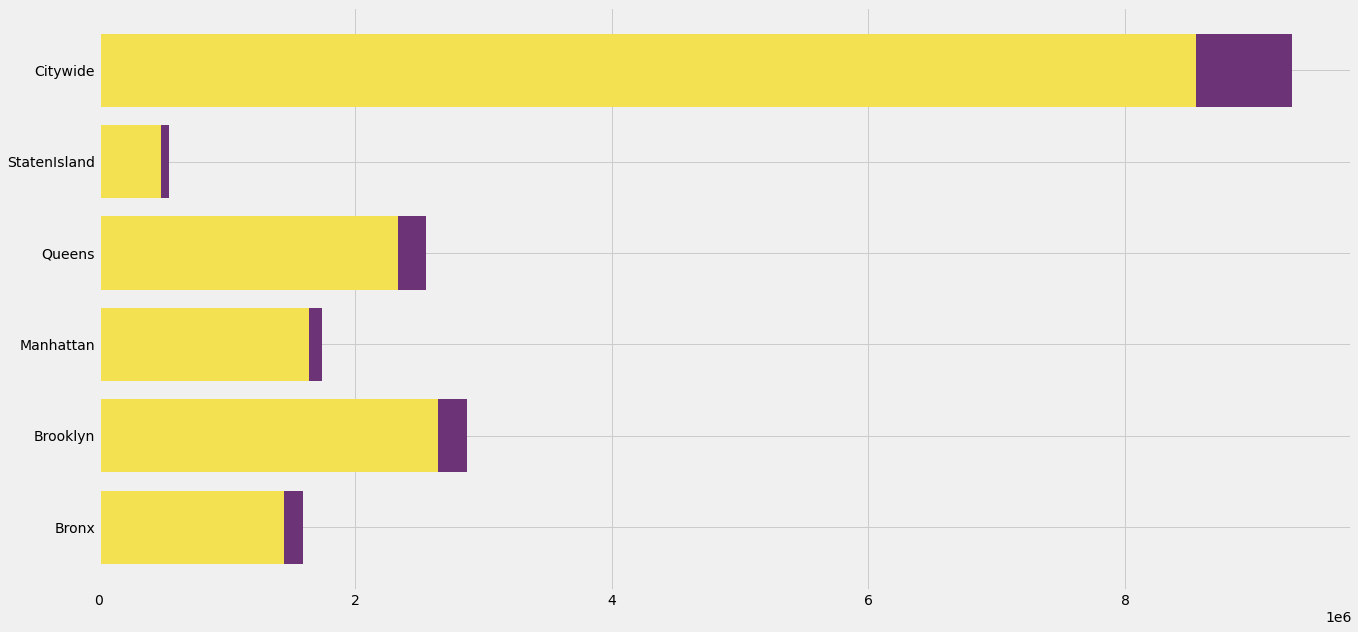

In [22]:
from matplotlib import style

user_filter = "CASE_COUNT"
boroughs = "BOROUGH_GROUP"
population = "POPULATION"
ticks = ["Bronx", "Brooklyn", "Manhattan", "Queens", "StatenIsland","Citywide" ]

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("red", "purple")
ax.barh(ticks, totals_boro[population],color="#f3e151")
ax.barh(ticks, totals_boro[user_filter], left= totals_boro[population], color="#6c3376")

# plt.bar(year, tutorial_premium, color="#f3e151")  
# plt.bar(year, tutorial_public, bottom=tutorial_premium, color="#6c3376")
# ax.set_title(f'Number of cases per age group in {borough_filter[:2]}',size=24)
# ax.set_xlabel('Age group',size=15)
# ax.set_ylabel('Number of cases', size=15)
plt.show()